# The Evolution of the NBA and the Rise of the 3pt Shooting Era
In this project I will be exploring how the game of basketball played in the NBA has changed over the last 20 seasons. 

## heading 2.1
### heading 2.2

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from os import path

Setting up our directory for where we will be getting our data and loading our nba sample game data from the 2019-20 season

In [2]:
DATA_DIR = 'C:/Users/Jordan Chen/code_basketball/basketball_files/data'

dfg = pd.read_csv(path.join(DATA_DIR, 'games.csv'))
dfg.columns

Index(['game_id', 'home', 'away', 'date', 'home_pts', 'away_pts', 'min',
       'home_fgm', 'home_fga', 'home_fg_pct', 'home_fg3m', 'home_fg3a',
       'home_fg3_pct', 'home_ftm', 'home_fta', 'home_ft_pct', 'home_oreb',
       'home_dreb', 'home_reb', 'home_ast', 'home_stl', 'home_blk', 'home_tov',
       'home_pf', 'home_plus_minus', 'away_fgm', 'away_fga', 'away_fg_pct',
       'away_fg3m', 'away_fg3a', 'away_fg3_pct', 'away_ftm', 'away_fta',
       'away_ft_pct', 'away_oreb', 'away_dreb', 'away_reb', 'away_ast',
       'away_stl', 'away_blk', 'away_tov', 'away_pf', 'away_plus_minus',
       'bubble', 'sample', 'season'],
      dtype='object')

In [3]:
cols = ['home', 'away', 'home_pts', 'away_pts', 'home_fgm', 'home_fga',
        'home_fg_pct', 'home_fg3m', 'home_fg3a', 'home_fg3_pct', 'home_ftm',
        'home_fta', 'home_ft_pct', 'home_oreb', 'home_dreb', 'home_reb',
        'home_ast', 'home_stl', 'home_blk', 'home_tov', 'home_pf',
        'home_plus_minus', 'away_fgm', 'away_fga', 'away_fg_pct', 'away_fg3m',
        'away_fg3a', 'away_fg3_pct', 'away_ftm', 'away_fta', 'away_ft_pct',
        'away_oreb', 'away_dreb', 'away_reb', 'away_ast', 'away_stl',
        'away_blk', 'away_tov', 'away_pf', 'away_plus_minus']


In [4]:
dfh = DataFrame(dfg[cols], copy=True)
dfh['win'] = dfh['home_pts'] > dfh['away_pts']
dfh.columns = [x.replace('home', 'team') for x in dfh.columns]
dfh.columns = [x.replace('away', 'opp') for x in dfh.columns]

dfa = DataFrame(dfg[cols], copy=True)
dfa['win'] = dfa['home_pts'] < dfa['away_pts']
dfa.columns = [x.replace('away', 'team') for x in dfa.columns]
dfa.columns = [x.replace('home', 'opp') for x in dfa.columns]

df = pd.concat([dfh, dfa], ignore_index=True)
df.head()

,team,opp,team_pts,opp_pts,team_fgm,team_fga,team_fg_pct,team_fg3m,team_fg3a,team_fg3_pct,...,opp_oreb,opp_dreb,opp_reb,opp_ast,opp_stl,opp_blk,opp_tov,opp_pf,opp_plus_minus,win
0,TOR,NOP,130,122,42,103,0.408,14,40,0.350,...,16,37,53,30,4,9,19,34,-8,True
1,LAC,LAL,112,102,42,81,0.519,11,31,0.355,...,9,32,41,20,4,7,14,24,-10,True
2,CHA,CHI,126,125,45,88,0.511,23,44,0.523,...,20,29,49,25,11,4,10,20,-1,True
3,IND,DET,110,119,41,89,0.461,8,21,0.381,...,10,35,45,26,5,6,18,21,9,False
4,ORL,CLE,94,85,37,86,0.430,9,30,0.300,...,10,44,54,20,8,2,16,15,-9,True


In [5]:
xvars = ['team_pts', 'opp_pts', 'team_fgm', 'team_fga', 'team_fg3m',
        'team_fg3a', 'team_ftm', 'team_fta', 'team_oreb', 'team_dreb',
        'team_reb', 'team_ast', 'team_stl', 'team_blk', 'team_tov', 'team_pf',
        'opp_fgm', 'opp_fga', 'opp_fg3m', 'opp_fg3a',
        'opp_ftm', 'opp_fta', 'opp_oreb', 'opp_dreb', 'opp_reb', 'opp_ast',
        'opp_stl', 'opp_blk', 'opp_tov', 'opp_pf']
yvar = 'win'

train, test = train_test_split(df, test_size=0.20)

model = RandomForestClassifier(n_estimators=100)
model.fit(train[xvars], train[yvar])

test['win_hat'] = model.predict(test[xvars])
test['correct'] = (test['win_hat'] == test['win'])
test['correct'].mean()

0.9575471698113207

In [8]:
sum_cols = ['team_pts', 'opp_pts', 'team_fgm', 'team_fga', 'team_fg3m',
        'team_fg3a', 'team_ftm', 'team_fta', 'team_oreb', 'team_dreb',
        'team_reb', 'team_ast', 'team_stl', 'team_blk', 'team_tov', 'team_pf',
        'team_plus_minus', 'opp_fgm', 'opp_fga', 'opp_fg3m', 'opp_fg3a',
        'opp_ftm', 'opp_fta', 'opp_oreb', 'opp_dreb', 'opp_reb', 'opp_ast',
        'opp_stl', 'opp_blk', 'opp_tov', 'opp_pf', 'opp_plus_minus', 'win']

df2 = df.groupby('team')[sum_cols].sum().reset_index()

In [6]:
probs = DataFrame(model.predict_proba(test[xvars]),
                  index=test.index,
                  columns=model.classes_)
probs['actual_win_data'] = test['win']
probs.head()

,False,True,actual_win_data
280,0.40,0.60,True
606,0.06,0.94,True
1097,0.67,0.33,False
927,0.75,0.25,False
610,0.90,0.10,False


In [9]:


model.fit(df2[xvars], df2[yvar])  # running model fitting on entire dataset
Series(model.feature_importances_, xvars).sort_values(ascending=False)

team_oreb    0.066625
opp_blk      0.051696
team_fgm     0.051610
team_ast     0.045232
opp_fga      0.042587
team_dreb    0.038110
opp_stl      0.036833
team_tov     0.036600
opp_fgm      0.034194
opp_tov      0.033323
opp_pf       0.032914
team_fga     0.032732
opp_oreb     0.031866
team_pts     0.031830
opp_fg3a     0.031431
team_reb     0.031264
team_ftm     0.030257
team_pf      0.029570
opp_fta      0.028642
team_blk     0.028630
team_fg3a    0.028243
team_fg3m    0.028087
opp_fg3m     0.027356
opp_ftm      0.027033
team_fta     0.026791
opp_dreb     0.025714
team_stl     0.025365
opp_ast      0.022463
opp_reb      0.022309
opp_pts      0.020695
dtype: float64

In [17]:
important_features = DataFrame(model.feature_importances_, xvars)
important_features.reset_index(inplace=True)
important_features.columns = ['features', 'importance']
important_features.sort_values(by='importance', ascending=False, inplace=True)

In [18]:
import plotly.express as px
fig = px.bar(important_features, x='features', y='importance')
fig.update_layout(title='Importance of features to the Model')
fig.show()

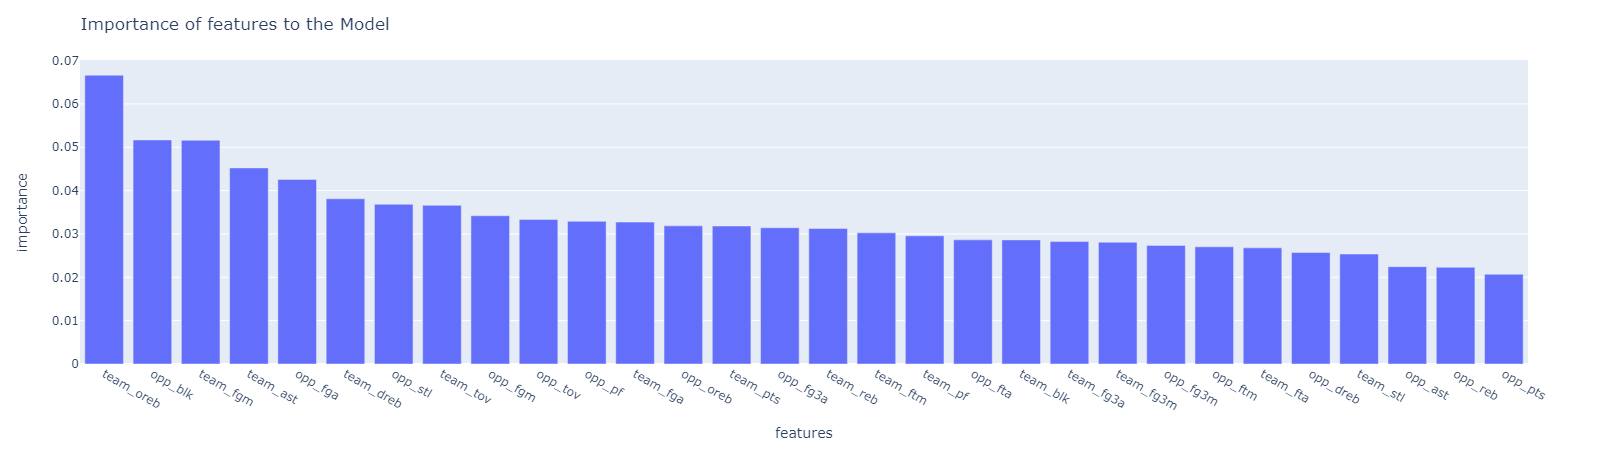